# Vader 

In [37]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

In [38]:
#pd.set_option('display.max_columns')
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
#additional_stop_words = {'year', 'state', 'also', 'just', 'really', 'still', 'would'} 
#stop_words.update(additional_stop_words)
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''
    
    # Remove numbers, months, and years
    text = re.sub(r'\d+', '', text)  # Remove numbers
    #text = re.sub(r'(January|February|March|April|May|June|July|August|September|October|November|December)', '', text, flags=re.IGNORECASE)  # Remove months
    text = re.sub(r'(19\d{2}|20\d{2})', '', text)  # Remove years

    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [40]:
!pip install vadersentiment

In [41]:
#import vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [42]:
import pandas as pd 
df = pd.read_csv('Final Alani\'s reviews.csv')
# Apply preprocessing to the 'Delay Description' column
df['title']=df['title'].apply(preprocess_text)
df['reviews'] = df['reviews'].apply(preprocess_text)
analyzer = SentimentIntensityAnalyzer()

#parsing the data(the dataframe from before) into the analyzer
scores = [analyzer.polarity_scores(sentence) for sentence in df]

In [43]:
df['title']=df['title'].str.lower()
df['reviews']=df['reviews'].str.lower()


In [44]:
# Convert 'title' and 'reviews' to string, replace NaN with empty strings
df['title'] = df['title'].fillna('').astype(str)
df['reviews'] = df['reviews'].fillna('').astype(str)

# Combine 'title' and 'reviews' into one column and convert to lowercase
df['combined'] = df['title'].str.cat(df['reviews'], sep=' ').str.lower()


In [45]:
df['rating']= df['rating'].apply(lambda x: float(x.split()[0]))
df['rating']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
493    5.0
494    5.0
495    5.0
496    5.0
497    5.0
Name: rating, Length: 498, dtype: float64

In [46]:
df

,Unnamed: 0,product,date,rating,title,reviews,combined
0,0,Amazon.com: Customer reviews: Alani Energy Drink,"April 20, 2024",1.0,received wrong item,product amazing company received wrong item tw...,received wrong item product amazing company re...
1,1,Amazon.com: Customer reviews: Alani Energy Drink,"April 19, 2024",1.0,terrible delivery result,came can basically empty even come alani box a...,terrible delivery result came can basically em...
2,2,Amazon.com: Customer reviews: Alani Energy Drink,"April 18, 2024",1.0,wrong order get refund,wanted orange kiss new flavor given mimosa ins...,wrong order get refund wanted orange kiss new ...
3,3,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,cans damaged,sure contact alani nu can damaged arrived prim...,cans damaged sure contact alani nu can damaged...
4,4,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,wrong item sent several time,love alani product ordered orange kiss flavor ...,wrong item sent several time love alani produc...
...,...,...,...,...,...,...,...
493,493,Amazon.com: Customer reviews: Alani Energy Drink,"January 13, 2024",5.0,product described,ordered regularly product come reasonable time...,product described ordered regularly product co...
494,494,Amazon.com: Customer reviews: Alani Energy Drink,"January 12, 2024",5.0,good stuff,delicious flavor,good stuff delicious flavor
495,495,Amazon.com: Customer reviews: Alani Energy Drink,"January 11, 2024",5.0,flavor,love flavor,flavor love flavor
496,496,Amazon.com: Customer reviews: Alani Energy Drink,"January 10, 2024",5.0,great flavor,looking boost want sugar shock drink,great flavor looking boost want sugar shock drink


In [47]:
#df = df.drop(columns=['rating_number'])
def encode_sentiment(rating):
    if rating >= 4.0:
        return 1
    else:
        return 0

df['sentiment']=df['rating'].apply(encode_sentiment)
df
    

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment
0,0,Amazon.com: Customer reviews: Alani Energy Drink,"April 20, 2024",1.0,received wrong item,product amazing company received wrong item tw...,received wrong item product amazing company re...,0
1,1,Amazon.com: Customer reviews: Alani Energy Drink,"April 19, 2024",1.0,terrible delivery result,came can basically empty even come alani box a...,terrible delivery result came can basically em...,0
2,2,Amazon.com: Customer reviews: Alani Energy Drink,"April 18, 2024",1.0,wrong order get refund,wanted orange kiss new flavor given mimosa ins...,wrong order get refund wanted orange kiss new ...,0
3,3,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,cans damaged,sure contact alani nu can damaged arrived prim...,cans damaged sure contact alani nu can damaged...,0
4,4,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,wrong item sent several time,love alani product ordered orange kiss flavor ...,wrong item sent several time love alani produc...,0
...,...,...,...,...,...,...,...,...
493,493,Amazon.com: Customer reviews: Alani Energy Drink,"January 13, 2024",5.0,product described,ordered regularly product come reasonable time...,product described ordered regularly product co...,1
494,494,Amazon.com: Customer reviews: Alani Energy Drink,"January 12, 2024",5.0,good stuff,delicious flavor,good stuff delicious flavor,1
495,495,Amazon.com: Customer reviews: Alani Energy Drink,"January 11, 2024",5.0,flavor,love flavor,flavor love flavor,1
496,496,Amazon.com: Customer reviews: Alani Energy Drink,"January 10, 2024",5.0,great flavor,looking boost want sugar shock drink,great flavor looking boost want sugar shock drink,1


In [48]:
df['sentiment'].value_counts()

sentiment
0    300
1    198
Name: count, dtype: int64

In [49]:
neg_s = [i["neg"] for i in scores]
neu_s = [i["neu"] for i in scores]
pos_s = [i["pos"] for i in scores]
compound_s = [i["compound"] for i in scores]

In [50]:
# Ensure Sentences column contains strings, not lists
#df['reviews'] = df['reviews'].str.join(' ') 

df['vader_scores'] = df['combined'].apply(lambda x: analyzer.polarity_scores(x))

df['negscore_Vader'] = df['vader_scores'].apply(lambda x: x['neg'])
df['neuscore_Vader'] = df['vader_scores'].apply(lambda x: x['neu'])
df['posscore_Vader'] = df['vader_scores'].apply(lambda x: x['pos'])
df['compound_Vader'] = df['vader_scores'].apply(lambda x: x['compound'])

# Define a function that classifies sentiments based on the compound score
def classify_vader_sentiment(row, threshold=0.05):
    if row['compound_Vader'] >= threshold:
        return 1  # Positive sentiment
    else: 
        return 0  # Negative sentiment
    
#df.drop('vader_scores', axis=1, inplace=True)

#vader_textblob_df = df[['product', 'rating', 'title', 'reviews', 'combined', 'polarity', 'subjectivity','negscore_Vader', 'neuscore_Vader', 'posscore_Vader', 'compound_Vader']]
df['Vader_Sentiment'] = df.apply(classify_vader_sentiment, axis=1)
df



,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment
0,0,Amazon.com: Customer reviews: Alani Energy Drink,"April 20, 2024",1.0,received wrong item,product amazing company received wrong item tw...,received wrong item product amazing company re...,0,"{'neg': 0.332, 'neu': 0.374, 'pos': 0.294, 'co...",0.332,0.374,0.294,-0.1779,0
1,1,Amazon.com: Customer reviews: Alani Energy Drink,"April 19, 2024",1.0,terrible delivery result,came can basically empty even come alani box a...,terrible delivery result came can basically em...,0,"{'neg': 0.216, 'neu': 0.546, 'pos': 0.238, 'co...",0.216,0.546,0.238,0.2023,1
2,2,Amazon.com: Customer reviews: Alani Energy Drink,"April 18, 2024",1.0,wrong order get refund,wanted orange kiss new flavor given mimosa ins...,wrong order get refund wanted orange kiss new ...,0,"{'neg': 0.249, 'neu': 0.626, 'pos': 0.125, 'co...",0.249,0.626,0.125,-0.4176,0
3,3,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,cans damaged,sure contact alani nu can damaged arrived prim...,cans damaged sure contact alani nu can damaged...,0,"{'neg': 0.391, 'neu': 0.43, 'pos': 0.18, 'comp...",0.391,0.430,0.180,-0.6597,0
4,4,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,wrong item sent several time,love alani product ordered orange kiss flavor ...,wrong item sent several time love alani produc...,0,"{'neg': 0.129, 'neu': 0.581, 'pos': 0.29, 'com...",0.129,0.581,0.290,0.5994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,493,Amazon.com: Customer reviews: Alani Energy Drink,"January 13, 2024",5.0,product described,ordered regularly product come reasonable time...,product described ordered regularly product co...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0
494,494,Amazon.com: Customer reviews: Alani Energy Drink,"January 12, 2024",5.0,good stuff,delicious flavor,good stuff delicious flavor,1,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...",0.000,0.233,0.767,0.7650,1
495,495,Amazon.com: Customer reviews: Alani Energy Drink,"January 11, 2024",5.0,flavor,love flavor,flavor love flavor,1,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.000,0.323,0.677,0.6369,1
496,496,Amazon.com: Customer reviews: Alani Energy Drink,"January 10, 2024",5.0,great flavor,looking boost want sugar shock drink,great flavor looking boost want sugar shock drink,1,"{'neg': 0.177, 'neu': 0.272, 'pos': 0.551, 'co...",0.177,0.272,0.551,0.6705,1


In [51]:
df['Vader_Sentiment'].value_counts()


Vader_Sentiment
1    335
0    163
Name: count, dtype: int64

In [52]:
# Create a column for positive compound scores
df['positive_compound'] = df['compound_Vader'].apply(lambda x: x if x > 0 else None)

# Create a column for negative compound scores
df['negative_compound'] = df['compound_Vader'].apply(lambda x: x if x <= 0 else None)

# Display the DataFrame to verify the new columns
df[['compound_Vader', 'positive_compound', 'negative_compound']]


,compound_Vader,positive_compound,negative_compound
0,-0.1779,NaN,-0.1779
1,0.2023,0.2023,NaN
2,-0.4176,NaN,-0.4176
3,-0.6597,NaN,-0.6597
4,0.5994,0.5994,NaN
...,...,...,...
493,0.0000,NaN,0.0000
494,0.7650,0.7650,NaN
495,0.6369,0.6369,NaN
496,0.6705,0.6705,NaN


In [ ]:
df.to_csv('Monster_Vader2.csv')

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

report = classification_report(df['sentiment'], df['Vader_Sentiment'], target_names=['Negative', 'Positive'], output_dict=False)
print(report)

              precision    recall  f1-score   support

    Negative       0.93      0.50      0.65       300
    Positive       0.56      0.94      0.70       198

    accuracy                           0.68       498
   macro avg       0.74      0.72      0.68       498
weighted avg       0.78      0.68      0.67       498



In [56]:
precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'], df['Vader_Sentiment'], average='weighted')
accuracy = accuracy_score(df['sentiment'], df['Vader_Sentiment'])

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Evaluation Metrics:
Precision: 0.78
Recall: 0.68
F1-Score: 0.67
Accuracy: 0.68


In [84]:
df.to_csv('Monster_vader.csv')

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


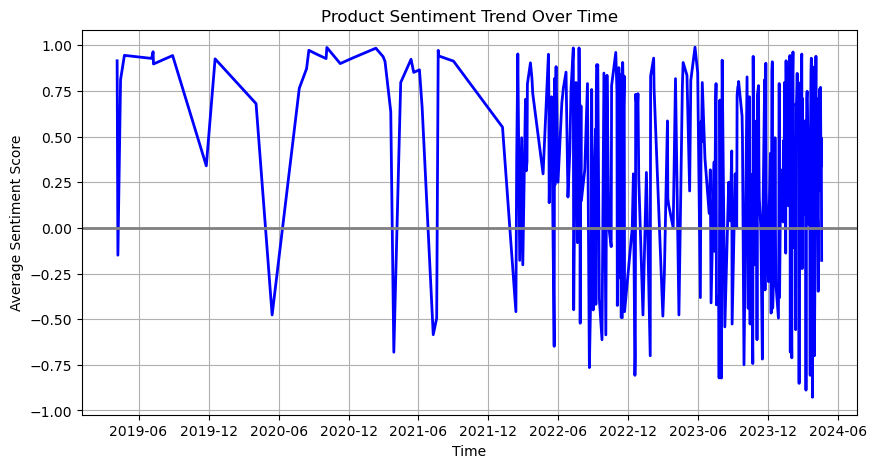

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

# Remove the unwanted text from the 'date' column
df['date'] = df['date'].str.replace(r'Reviewed in .* on ', '', regex=True)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%B %d, %Y')

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Aggregate the sentiment scores by date. 
df_aggregated = df.groupby('date')['compound_Vader'].mean().reset_index()

# Plot the trend line
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['compound_Vader'], marker='', color='blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')


# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Product Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')

# Save with a transparent background
plt.savefig('red bull trend over year.png', transparent=True, bbox_inches='tight')

plt.show()


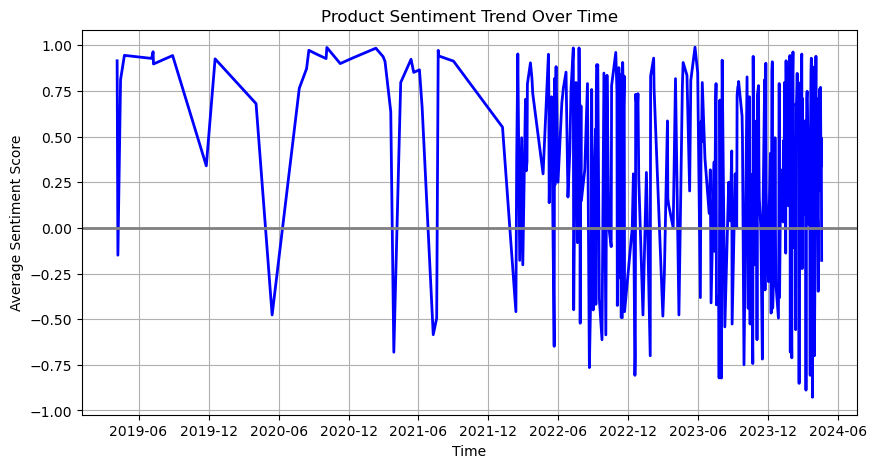

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Aggregate the sentiment scores by date.
df_aggregated = df.groupby('date')['compound_Vader'].mean().reset_index()

# Plot the trend line
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['compound_Vader'], marker='', color='blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')


# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Product Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')


plt.show()


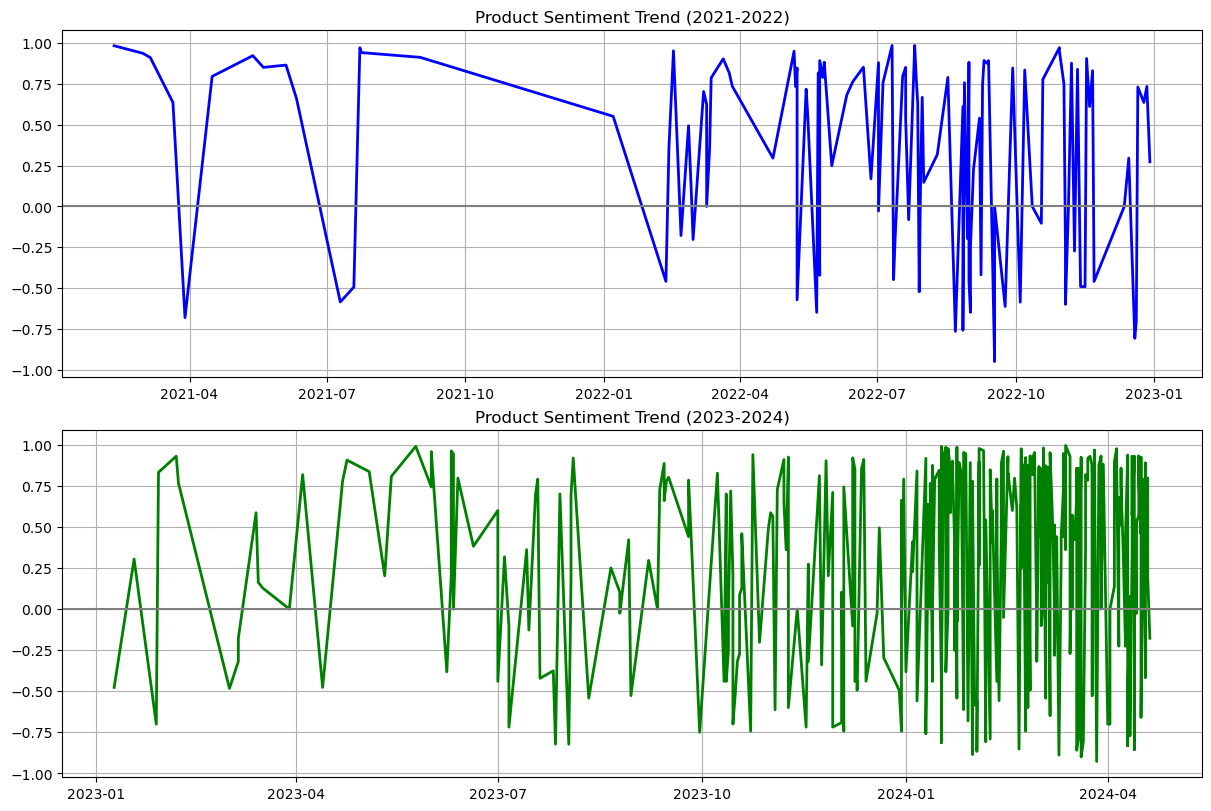

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df = df.sort_values('date')

# Split the data into two periods
df_2021_2022 = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2022-12-31')]
df_2023_2024 = df[(df['date'] >= '2023-01-01') & (df['date'] <= '2024-12-31')]

# Create the plots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True)

# Plot for the range 2021-2022
axs[0].plot(df_2021_2022['date'], df_2021_2022['compound_Vader'], marker='', color='blue', linewidth=2)
axs[0].axhline(0, color='gray', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
axs[0].set_title('Product Sentiment Trend (2021-2022)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # Only the months January, April, July, October
axs[0].grid(True) # Optional: Add grid for better readability

# Plot for the range 2023-2024
axs[1].plot(df_2023_2024['date'], df_2023_2024['compound_Vader'], marker='', color='green', linewidth=2)
axs[1].axhline(0, color='gray', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
axs[1].set_title('Product Sentiment Trend (2023-2024)')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  # Only the months January, April, July, October
axs[1].grid(True) # Optional: Add grid for better readability

plt.show()


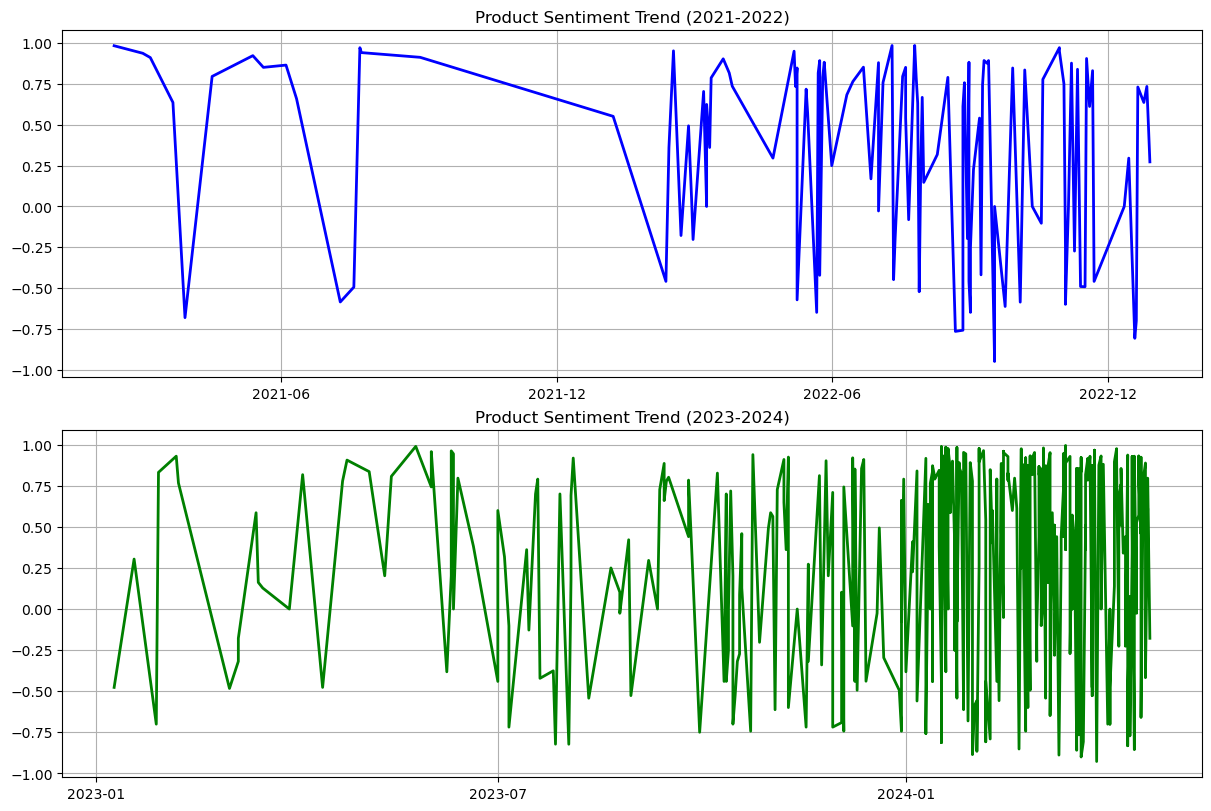

In [23]:
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df = df.sort_values('date')

# Split the data into two periods
df_2021_2022 = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2022-12-31')]
df_2023_2024 = df[(df['date'] >= '2023-01-01') & (df['date'] <= '2024-12-31')]

# Create the plots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True)

# 2021-2022 Trend Line
axs[0].plot(df_2021_2022['date'], df_2021_2022['compound_Vader'], marker='', color='blue', linewidth=2)
axs[0].set_title('Product Sentiment Trend (2021-2022)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axs[0].grid(True) # Optional: Add grid for better readability

# 2023-2024 Trend Line
axs[1].plot(df_2023_2024['date'], df_2023_2024['compound_Vader'], marker='', color='green', linewidth=2)
axs[1].set_title('Product Sentiment Trend (2023-2024)')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axs[1].grid(True) # Optional: Add grid for better readability

plt.show()

In [57]:
redbull_df = pd.read_csv('RedBULL_vader.csv')
redbull_df_2024 = redbull_df[(redbull_df['date'] >= '2024-01-01') & (redbull_df['date'] <= '2024-12-31')]
redbull_df

,Unnamed: 0.1,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment,positive_compound,negative_compound,month_year
0,0,0,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,1,"{'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'comp...",0.000,0.288,0.712,0.8720,1,0.8720,NaN,April 2024
1,1,1,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-16,1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...,0,"{'neg': 0.41, 'neu': 0.518, 'pos': 0.072, 'com...",0.410,0.518,0.072,-0.8176,0,NaN,-0.8176,April 2024
2,2,2,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-16,3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...,0,"{'neg': 0.236, 'neu': 0.548, 'pos': 0.216, 'co...",0.236,0.548,0.216,-0.1779,0,NaN,-0.1779,April 2024
3,3,3,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-14,5.0,energizing without sugar rush,surviving new dietary restriction daunting red...,energizing without sugar rush surviving new di...,1,"{'neg': 0.045, 'neu': 0.678, 'pos': 0.277, 'co...",0.045,0.678,0.277,0.9903,1,0.9903,NaN,April 2024
4,4,4,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-13,5.0,son like,son like drinking real long time,son like son like drinking real long time,1,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.000,0.545,0.455,0.6124,1,0.6124,NaN,April 2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,2023-03-09,5.0,good deal,watermelon red bull delicious purchased enjoye...,good deal watermelon red bull delicious purcha...,1,"{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp...",0.000,0.429,0.571,0.9001,1,0.9001,NaN,March 2023
496,496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,2023-03-08,5.0,love flavor red bulls,bad pricing either,love flavor red bulls bad pricing either,1,"{'neg': 0.276, 'neu': 0.394, 'pos': 0.331, 'co...",0.276,0.394,0.331,0.1779,1,0.1779,NaN,March 2023
497,497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,2023-03-05,5.0,awesome taste fantastic company price,delivery perfect thanks red bull cans packed t...,awesome taste fantastic company price delivery...,1,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.000,0.377,0.623,0.9786,1,0.9786,NaN,March 2023
498,498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,2023-02-25,5.0,jolly rancher,jolly rancher flavor taste like real watermelo...,jolly rancher jolly rancher flavor taste like ...,1,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.000,0.625,0.375,0.8860,1,0.8860,NaN,February 2023


In [58]:
redbull_df = pd.read_csv('RedBULL_vader.csv')
redbull_df = redbull_df[(redbull_df['date'] >= '2023-01-01') & (redbull_df['date'] <= '2024-12-31')]
mons_df = pd.read_csv('Monster_Vader2.csv')
mons_df = mons_df[(mons_df['date'] >= '2023-01-01') & (mons_df['date'] <= '2024-12-31')]
c4_df = pd.read_csv('C4_vader2.csv')
c4_df = c4_df[(c4_df['date'] >= '2023-01-01') & (c4_df['date'] <= '2024-12-31')]
df_year = df[(df['date'] >= '2023-01-01') & (df['date'] <= '2024-12-31')]

In [75]:
c4_df

,Unnamed: 0.1,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment,positive_compound,negative_compound,month_year
0,0,0,Amazon.com: Customer reviews: Alani Energy Drink,2024-04-20,1.0,received wrong item,"the product is amazing from the company, but i...",received wrong item the product is amazing fro...,0,"{'neg': 0.224, 'neu': 0.615, 'pos': 0.161, 'co...",0.224,0.615,0.161,-0.4118,0,NaN,-0.4118,April 2024
1,1,1,Amazon.com: Customer reviews: Alani Energy Drink,2024-04-19,1.0,terrible delivery and result,only came with 10 cans - 1 being basically emp...,terrible delivery and result only came with 10...,0,"{'neg': 0.134, 'neu': 0.713, 'pos': 0.153, 'co...",0.134,0.713,0.153,0.2714,1,0.2714,NaN,April 2024
2,2,2,Amazon.com: Customer reviews: Alani Energy Drink,2024-04-18,1.0,wrong order and can’t get a refund,i wanted orange kiss because it was a new flav...,wrong order and can’t get a refund i wanted or...,0,"{'neg': 0.154, 'neu': 0.79, 'pos': 0.056, 'com...",0.154,0.790,0.056,-0.5220,0,NaN,-0.5220,April 2024
3,3,3,Amazon.com: Customer reviews: Alani Energy Drink,2024-04-16,1.0,cans damaged,not sure who i contact but the alani nu cans w...,cans damaged not sure who i contact but the al...,0,"{'neg': 0.323, 'neu': 0.603, 'pos': 0.074, 'co...",0.323,0.603,0.074,-0.8370,0,NaN,-0.8370,April 2024
4,4,4,Amazon.com: Customer reviews: Alani Energy Drink,2024-04-16,1.0,wrong item sent several times.,i love the alani product but i have ordered th...,wrong item sent several times. i love the alan...,0,"{'neg': 0.065, 'neu': 0.734, 'pos': 0.201, 'co...",0.065,0.734,0.201,0.6428,1,0.6428,NaN,April 2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,493,493,Amazon.com: Customer reviews: Alani Energy Drink,2024-01-13,5.0,product is as described,we've ordered this regularly. product comes in...,product is as described we've ordered this reg...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,NaN,0.0000,January 2024
494,494,494,Amazon.com: Customer reviews: Alani Energy Drink,2024-01-12,5.0,good stuff,delicious flavor!,good stuff delicious flavor!,1,"{'neg': 0.0, 'neu': 0.225, 'pos': 0.775, 'comp...",0.000,0.225,0.775,0.7840,1,0.7840,NaN,January 2024
495,495,495,Amazon.com: Customer reviews: Alani Energy Drink,2024-01-11,5.0,flavor,love the flavor,flavor love the flavor,1,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.000,0.417,0.583,0.6369,1,0.6369,NaN,January 2024
496,496,496,Amazon.com: Customer reviews: Alani Energy Drink,2024-01-10,5.0,great flavor,if your looking for a boost but don’t want the...,great flavor if your looking for a boost but d...,1,"{'neg': 0.146, 'neu': 0.602, 'pos': 0.252, 'co...",0.146,0.602,0.252,0.1154,1,0.1154,NaN,January 2024


In [59]:
import pandas as pd

redbull_df['date'] = pd.to_datetime(redbull_df['date'])
mons_df['date'] = pd.to_datetime(mons_df['date'])
c4_df['date'] = pd.to_datetime(c4_df['date'])
df_year['date'] = pd.to_datetime(df_year['date'])

# Group the data by month and calculate the average compound score for Red Bull
redbull_yearly_avg = redbull_df.resample('Y', on='date')['compound_Vader'].mean().rename('Red Bull')

# Group the data by month and calculate the average compound score for Alani
alani_yearly_avg = df_year.resample('Y', on='date')['compound_Vader'].mean().rename('Alani')

# Group the data by month and calculate the average compound score for Red Bull
mons_yearly_avg = mons_df.resample('Y', on='date')['compound_Vader'].mean().rename('Monster Energy')

# Group the data by month and calculate the average compound score for Alani
c4_yearly_avg = c4_df.resample('Y', on='date')['compound_Vader'].mean().rename('C4')


# Combine the series into a single DataFrame with the year as the index
yearly_avg_compound = pd.concat([redbull_yearly_avg, mons_yearly_avg, c4_yearly_avg, alani_yearly_avg], axis=1)

# Reset the index to have the year as a column
yearly_avg_compound.reset_index(inplace=True)
yearly_avg_compound['Year'] = yearly_avg_compound['date'].dt.year
yearly_avg_compound.drop('date', axis=1, inplace=True)

yearly_avg_compound
#monthly_avg_compound.to_csv('Year comparison.csv')


,Red Bull,Monster Energy,C4,Alani,Year
0,0.481003,0.240877,0.064107,NaN,2023
1,0.350575,0.426549,0.234995,NaN,2024


In [27]:
df['date']

397   2019-04-06
382   2019-04-08
381   2019-04-15
396   2019-04-25
380   2019-07-05
         ...    
399   2024-04-19
398   2024-04-19
200   2024-04-19
1     2024-04-19
0     2024-04-20
Name: date, Length: 498, dtype: datetime64[ns]

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Split the data into positive and negative reviews based on sentiment
positive_reviews = df[df['Vader_Sentiment'] == 1]['combined']
negative_reviews = df[df['Vader_Sentiment'] == 0]['combined']

# Define the CountVectorizer
count_vectorizer = CountVectorizer(max_features=100) 

# Calculate BoW for positive reviews
bow_matrix_pos = count_vectorizer.fit_transform(positive_reviews)
feature_names_pos = count_vectorizer.get_feature_names_out()
df_pos_count = pd.DataFrame(bow_matrix_pos.toarray(), columns=feature_names_pos)

# Calculate BoW for negative reviews
count_vectorizer = CountVectorizer(max_features=100)  
bow_matrix_neg = count_vectorizer.fit_transform(negative_reviews)
feature_names_neg = count_vectorizer.get_feature_names_out()
df_neg_count = pd.DataFrame(bow_matrix_neg.toarray(), columns=feature_names_neg)

# Calculate total word frequency for positive reviews
total_counts_pos = df_pos_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_pos = total_counts_pos.reset_index().rename(columns={'index': 'term', 0: 'frequency'})

# Calculate total word frequency for negative reviews
total_counts_neg = df_neg_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_neg = total_counts_neg.reset_index().rename(columns={'index': 'term', 0: 'frequency'})



In [62]:
df_top_pos

,term,frequency
0,flavor,234
1,drink,206
2,love,140
3,energy,124
4,taste,121
5,like,117
6,can,106
7,good,100
8,great,88
9,one,82


In [63]:
df_top_neg

,term,frequency
0,can,143
1,damaged,121
2,box,64
3,product,49
4,empty,48
5,drink,37
6,flavor,33
7,package,32
8,came,31
9,arrived,30


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Split the data into positive and negative reviews based on sentiment
positive_reviews = df[df['Vader_Sentiment'] == 1]['combined']
negative_reviews = df[df['Vader_Sentiment'] == 0]['combined']

# Define the CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100) 
# Calculate BoW for positive reviews
bow_matrix_pos = count_vectorizer.fit_transform(positive_reviews)
feature_names_pos = count_vectorizer.get_feature_names_out()
df_pos_count = pd.DataFrame(bow_matrix_pos.toarray(), columns=feature_names_pos)

# Calculate BoW for negative reviews
count_vectorizer = CountVectorizer(max_features=100)  
bow_matrix_neg = count_vectorizer.fit_transform(negative_reviews)
feature_names_neg = count_vectorizer.get_feature_names_out()
df_neg_count = pd.DataFrame(bow_matrix_neg.toarray(), columns=feature_names_neg)

# Calculate total word frequency for positive reviews
total_counts_pos = df_pos_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_pos = total_counts_pos.reset_index().rename(columns={'index': 'term', 0: 'frequency'})

# Calculate total word frequency for negative reviews
total_counts_neg = df_neg_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_neg = total_counts_neg.reset_index().rename(columns={'index': 'term', 0: 'frequency'})



In [35]:
df_top_pos


,term,frequency
0,energy drink,71
1,alani nu,30
2,taste like,25
3,love alani,23
4,favorite flavor,22
5,love product,21
6,cosmic stardust,20
7,love drink,19
8,love flavor,18
9,orange kiss,15


In [36]:
df_top_neg

,term,frequency
0,can,143
1,damaged,121
2,box,64
3,product,49
4,empty,48
5,drink,37
6,flavor,33
7,package,32
8,came,31
9,arrived,30


# Features, vader on feature

In [65]:
features = ['taste','value', 'leakage', 'appearance', 'flavor', 'quality', 'sugar content', 'carbs', 'calories','appearance', 'caffeine content','calories', 'motivation','price','package','packaging','brand']
def feature_presence(combined, features):
    # Initialize an empty list to store the features present in the message
    present_features = []
    # Check each feature for its presence in the message
    for feature in features:
        if feature in combined: 
            present_features.append(feature)
    # Return the list of present features
    return ', '.join(present_features)

df['features'] = df['combined'].apply(feature_presence, features=features)

# Filter out rows where no features are detected
df = df[df['features'] != '']

df

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment,positive_compound,negative_compound,features
2,2,Amazon.com: Customer reviews: Alani Energy Drink,"April 18, 2024",1.0,wrong order get refund,wanted orange kiss new flavor given mimosa ins...,wrong order get refund wanted orange kiss new ...,0,"{'neg': 0.249, 'neu': 0.626, 'pos': 0.125, 'co...",0.249,0.626,0.125,-0.4176,0,NaN,-0.4176,flavor
4,4,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,wrong item sent several time,love alani product ordered orange kiss flavor ...,wrong item sent several time love alani produc...,0,"{'neg': 0.129, 'neu': 0.581, 'pos': 0.29, 'com...",0.129,0.581,0.290,0.5994,1,0.5994,NaN,flavor
6,6,Amazon.com: Customer reviews: Alani Energy Drink,"April 13, 2024",1.0,wrong order received x,ordered drink time received wrong flavor even ...,wrong order received x ordered drink time rece...,0,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",0.343,0.657,0.000,-0.8555,0,NaN,-0.8555,flavor
7,7,Amazon.com: Customer reviews: Alani Energy Drink,"April 13, 2024",1.0,second time sent wrong case,orange kiss flavor really good clean crisp tas...,second time sent wrong case orange kiss flavor...,0,"{'neg': 0.18, 'neu': 0.525, 'pos': 0.294, 'com...",0.180,0.525,0.294,0.5379,1,0.5379,NaN,"taste, flavor"
8,8,Amazon.com: Customer reviews: Alani Energy Drink,"April 10, 2024",1.0,wrong flavor received x,ordered orange kiss three time say stock recei...,wrong flavor received x ordered orange kiss th...,0,"{'neg': 0.15, 'neu': 0.7, 'pos': 0.15, 'compou...",0.150,0.700,0.150,-0.0000,0,NaN,-0.0000,"flavor, package, packaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,492,Amazon.com: Customer reviews: Alani Energy Drink,"January 13, 2024",5.0,great taste slightly pricey though,great taste slightly pricey though,great taste slightly pricey though great taste...,1,"{'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'comp...",0.000,0.502,0.498,0.8375,1,0.8375,NaN,"taste, price"
494,494,Amazon.com: Customer reviews: Alani Energy Drink,"January 12, 2024",5.0,good stuff,delicious flavor,good stuff delicious flavor,1,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...",0.000,0.233,0.767,0.7650,1,0.7650,NaN,flavor
495,495,Amazon.com: Customer reviews: Alani Energy Drink,"January 11, 2024",5.0,flavor,love flavor,flavor love flavor,1,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.000,0.323,0.677,0.6369,1,0.6369,NaN,flavor
496,496,Amazon.com: Customer reviews: Alani Energy Drink,"January 10, 2024",5.0,great flavor,looking boost want sugar shock drink,great flavor looking boost want sugar shock drink,1,"{'neg': 0.177, 'neu': 0.272, 'pos': 0.551, 'co...",0.177,0.272,0.551,0.6705,1,0.6705,NaN,flavor


In [66]:
df['features'].value_counts()

features
flavor                                           96
taste                                            56
package                                          37
taste, flavor                                    37
price                                            11
flavor, packaging                                 9
packaging                                         7
taste, price                                      7
flavor, price                                     5
flavor, brand                                     4
flavor, package                                   4
taste, flavor, brand                              4
taste, flavor, price                              4
flavor, package, packaging                        3
value                                             3
package, packaging                                3
taste, package                                    3
taste, packaging                                  2
taste, package, packaging                         2
qua

In [67]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Filter rows that mention 'taste' or 'flavor'
mask_taste = df['features'].str.contains('taste', na=False, case=False)
mask_flavor = df['features'].str.contains('flavor', na=False, case=False)
mask_price = df['features'].str.contains('price', na=False, case=False)
mask_package = df['features'].str.contains('package', na=False, case=False)
mask_value = df['features'].str.contains('value', na=False, case=False)
mask_packaging = df['features'].str.contains('packaging', na=False, case=False)

# Filter DataFrame based on the masks
df_taste = df[mask_taste]
df_flavor = df[mask_flavor]
df_price = df[mask_price]
df_package = df[mask_package]
df_value = df[mask_value]
df_packaging = df[mask_packaging]

# Define a function to apply VADER sentiment analysis and return the compound score
def get_vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply the VADER sentiment analysis function to the review text for 'taste' and 'flavor'
df_taste['sentiment_taste'] = df_taste['combined'].apply(get_vader_sentiment)
df_flavor['sentiment_flavor'] = df_flavor['combined'].apply(get_vader_sentiment)
df_taste['sentiment_price'] = df_taste['combined'].apply(get_vader_sentiment)
df_flavor['sentiment_package'] = df_flavor['combined'].apply(get_vader_sentiment)
df_taste['sentiment_value'] = df_taste['combined'].apply(get_vader_sentiment)
df_taste['sentiment_packaging'] = df_taste['combined'].apply(get_vader_sentiment)

# Apply VADER sentiment analysis and store results in the original DataFrame
df.loc[mask_taste, 'sentiment_taste'] = df.loc[mask_taste, 'combined'].apply(get_vader_sentiment)
df.loc[mask_flavor, 'sentiment_flavor'] = df.loc[mask_flavor, 'combined'].apply(get_vader_sentiment)
df.loc[mask_price, 'sentiment_price'] = df.loc[mask_price, 'combined'].apply(get_vader_sentiment)
df.loc[mask_package, 'sentiment_package'] = df.loc[mask_package, 'combined'].apply(get_vader_sentiment)
df.loc[mask_value, 'sentiment_value'] = df.loc[mask_value, 'combined'].apply(get_vader_sentiment)
df.loc[mask_value, 'sentiment_packaging'] = df.loc[mask_value, 'combined'].apply(get_vader_sentiment)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\tuhon\AppData\Local\Temp\ipykernel_11840\1324811391.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taste['sentiment_taste'] = df_taste['combined'].apply(get_vader_sentiment)
C:\Users\tuhon\AppData\Local\Temp\ipykernel_11840\1324811391.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flavor['sentiment_flavor'] = df_fla

In [132]:
df

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,...,Vader_Sentiment,positive_compound,negative_compound,features,sentiment_taste,sentiment_flavor,sentiment_price,sentiment_package,sentiment_value,sentiment_packaging
2,2,Amazon.com: Customer reviews: Alani Energy Drink,"April 18, 2024",1.0,wrong order get refund,wanted orange kiss new flavor given mimosa ins...,wrong order get refund wanted orange kiss new ...,0,"{'neg': 0.249, 'neu': 0.626, 'pos': 0.125, 'co...",0.249,...,0,NaN,-0.4176,flavor,NaN,-0.4176,NaN,NaN,NaN,NaN
4,4,Amazon.com: Customer reviews: Alani Energy Drink,"April 16, 2024",1.0,wrong item sent several time,love alani product ordered orange kiss flavor ...,wrong item sent several time love alani produc...,0,"{'neg': 0.129, 'neu': 0.581, 'pos': 0.29, 'com...",0.129,...,1,0.5994,NaN,flavor,NaN,0.5994,NaN,NaN,NaN,NaN
6,6,Amazon.com: Customer reviews: Alani Energy Drink,"April 13, 2024",1.0,wrong order received x,ordered drink time received wrong flavor even ...,wrong order received x ordered drink time rece...,0,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",0.343,...,0,NaN,-0.8555,flavor,NaN,-0.8555,NaN,NaN,NaN,NaN
7,7,Amazon.com: Customer reviews: Alani Energy Drink,"April 13, 2024",1.0,second time sent wrong case,orange kiss flavor really good clean crisp tas...,second time sent wrong case orange kiss flavor...,0,"{'neg': 0.18, 'neu': 0.525, 'pos': 0.294, 'com...",0.180,...,1,0.5379,NaN,"taste, flavor",0.5379,0.5379,NaN,NaN,NaN,NaN
8,8,Amazon.com: Customer reviews: Alani Energy Drink,"April 10, 2024",1.0,wrong flavor received x,ordered orange kiss three time say stock recei...,wrong flavor received x ordered orange kiss th...,0,"{'neg': 0.15, 'neu': 0.7, 'pos': 0.15, 'compou...",0.150,...,0,NaN,-0.0000,"flavor, package, packaging",NaN,-0.0000,NaN,-0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,492,Amazon.com: Customer reviews: Alani Energy Drink,"January 13, 2024",5.0,great taste slightly pricey though,great taste slightly pricey though,great taste slightly pricey though great taste...,1,"{'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'comp...",0.000,...,1,0.8375,NaN,"taste, price",0.8481,NaN,0.8481,NaN,NaN,NaN
494,494,Amazon.com: Customer reviews: Alani Energy Drink,"January 12, 2024",5.0,good stuff,delicious flavor,good stuff delicious flavor,1,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...",0.000,...,1,0.7650,NaN,flavor,NaN,0.7650,NaN,NaN,NaN,NaN
495,495,Amazon.com: Customer reviews: Alani Energy Drink,"January 11, 2024",5.0,flavor,love flavor,flavor love flavor,1,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.000,...,1,0.6369,NaN,flavor,NaN,0.6369,NaN,NaN,NaN,NaN
496,496,Amazon.com: Customer reviews: Alani Energy Drink,"January 10, 2024",5.0,great flavor,looking boost want sugar shock drink,great flavor looking boost want sugar shock drink,1,"{'neg': 0.177, 'neu': 0.272, 'pos': 0.551, 'co...",0.177,...,1,0.6705,NaN,flavor,NaN,0.6705,NaN,NaN,NaN,NaN


In [68]:
df[['product', 'date', 'rating', 'title', 'reviews', 'combined', 'sentiment', 'sentiment_taste', 'sentiment_flavor','sentiment_price','sentiment_package','sentiment_value','sentiment_packaging']].to_csv('feature alani.csv')


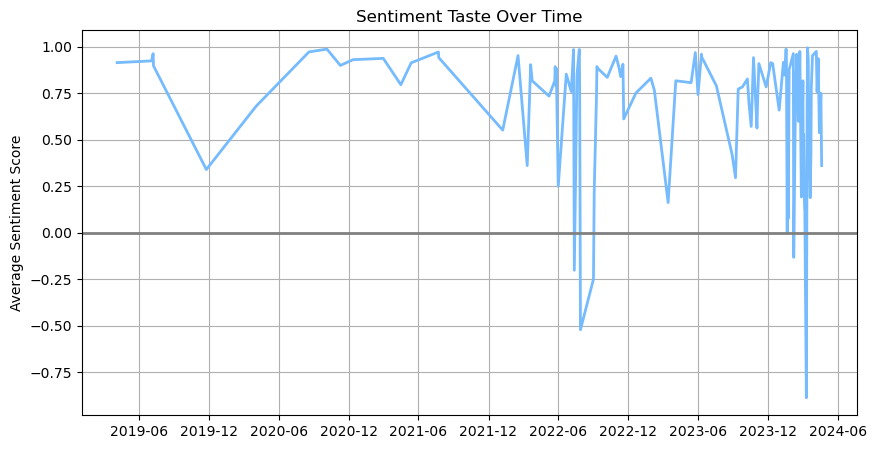

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_taste'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_taste'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_taste'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  
# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment Taste Over Time')
plt.ylabel('Average Sentiment Score')


plt.show()


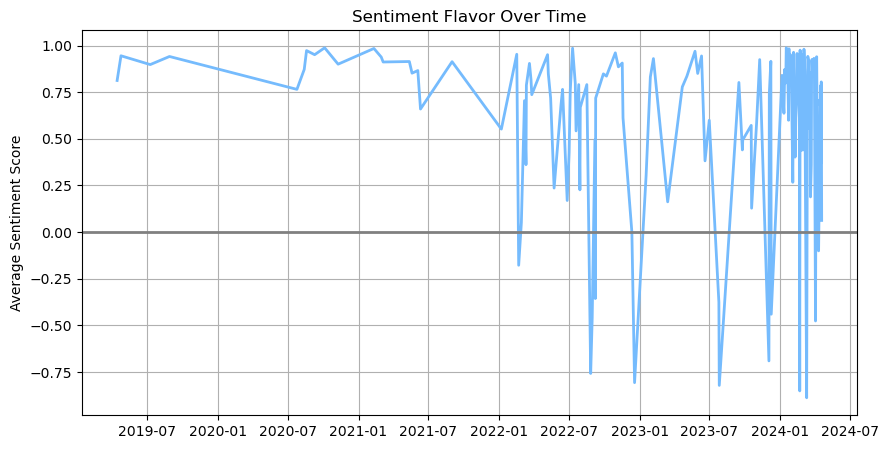

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_flavor'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_flavor'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_flavor'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  
# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment Flavor Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


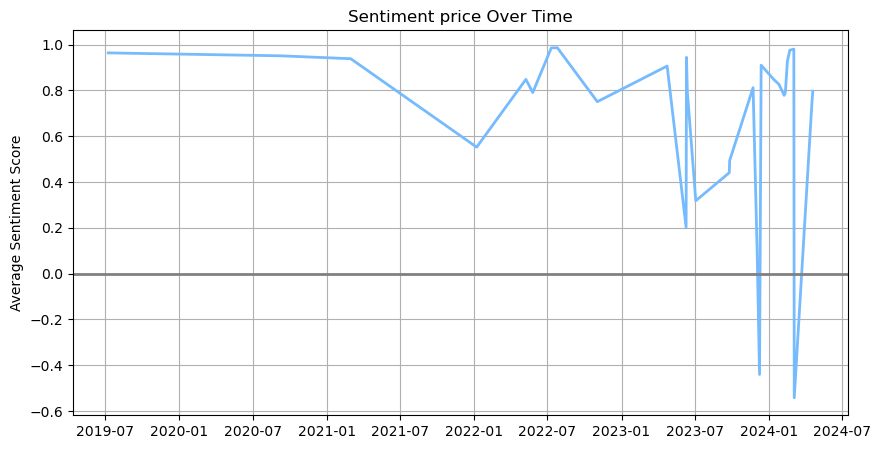

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_price'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_price'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_price'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment price Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


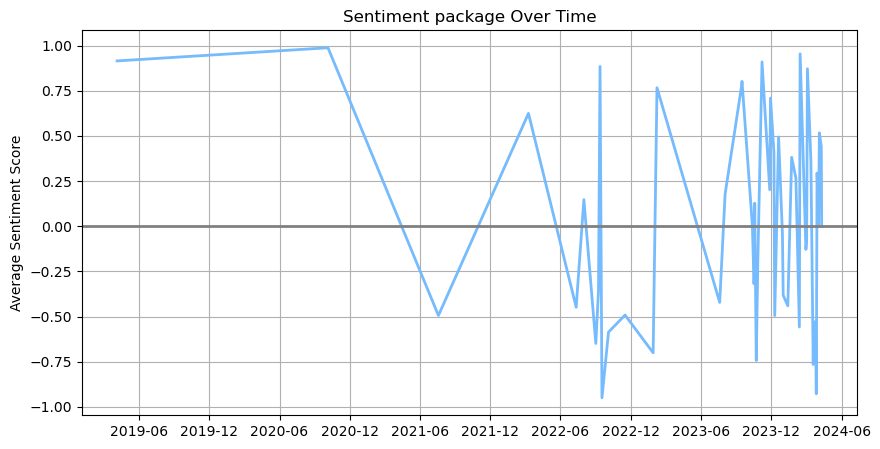

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_package'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_package'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_package'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment package Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


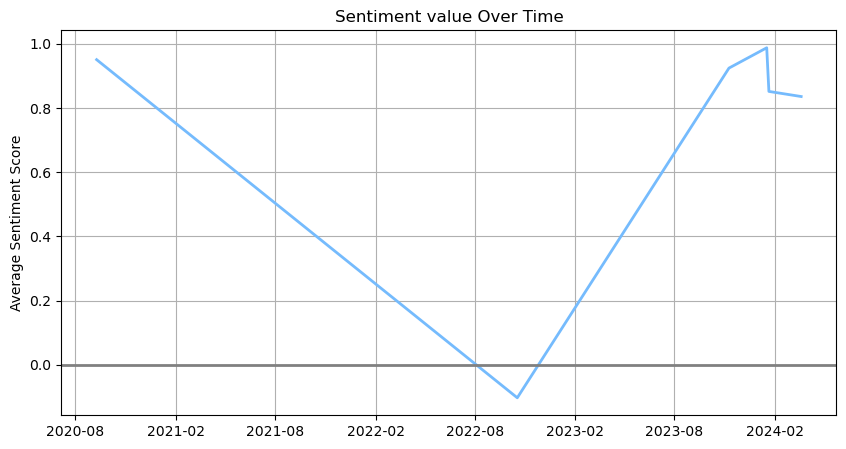

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_value'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_value'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_value'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment value Over Time')
plt.ylabel('Average Sentiment Score')

plt.show()


In [347]:
features = ['taste','value', 'leakage', 'appearance', 'flavor', 'quality', 'sugar content', 'carbs', 'calories','appearance', 'caffeine content','calories', 'motivation']
columns_to_average = ['negscore_Vader', 'neuscore_Vader', 'posscore_Vader', 'compound_Vader']

# Initialize a new DataFrame to store the average sentiment for each feature
df_feature_avgs = pd.DataFrame(index=features, columns=columns_to_average)

# For each feature, filter messages containing that feature and calculate average sentiment scores
for feature in features:
    messages_with_feature = df[df['combined'].str.contains(feature, case=False, na=False)]
    for column in columns_to_average:
        df_feature_avgs.at[feature, column] = messages_with_feature[column].mean()

df_feature_avgs.reset_index(inplace=True)
df_feature_avgs.rename(columns={'index': 'Feature'}, inplace=True)

df_feature_avgs

,Feature,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,taste,0.045989,0.638389,0.315611,0.627002
1,value,0.012833,0.482917,0.504167,0.802217
2,leakage,0.09,0.729,0.181,0.8453
3,appearance,NaN,NaN,NaN,NaN
4,flavor,0.0376,0.633462,0.328892,0.686723
5,quality,0.2036,0.6386,0.1576,0.07212
6,sugar content,NaN,NaN,NaN,NaN
7,carbs,NaN,NaN,NaN,NaN
8,calories,0.035,0.819,0.146,0.46025
9,appearance,NaN,NaN,NaN,NaN


In [348]:
import re
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

# Get synonyms for the features
def get_synonyms(word):
    synonyms = set()
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return synonyms

# Create a dictionary to store each feature and its synonyms
feature_synonyms = {feature: get_synonyms(feature) for feature in features}

# Update the filtering function to also filter out features and their synonyms
def filter_messages_by_feature_synonyms(df, feature_synonyms):
    # Initialize an empty DataFrame for each feature
    df_feature_avgs = pd.DataFrame(index=feature_synonyms.keys(), columns=columns_to_average)
    
    # For each feature and its synonyms, filter messages and calculate the average sentiment scores
    for feature, synonyms in feature_synonyms.items():
        # Create a regular expression to match the feature or any of its synonyms
        regex_pattern = '|'.join(map(re.escape, synonyms))
        sentences_with_feature = df[df['combined'].str.contains(regex_pattern, case=False, na=False)]
        for column in columns_to_average:
            df_feature_avgs.at[feature, column] = sentences_with_feature[column].mean()
    
    df_feature_avgs.reset_index(inplace=True)
    df_feature_avgs.rename(columns={'index': 'Feature'}, inplace=True)
    return df_feature_avgs

# Apply the filtering function
df_feature_avgs = filter_messages_by_feature_synonyms(df, feature_synonyms)
df_feature_avgs

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Feature,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,taste,0.04651,0.639073,0.314406,0.630646
1,value,0.032,0.543063,0.424813,0.77215
2,leakage,0.095,0.57,0.335,0.8522
3,appearance,NaN,NaN,NaN,NaN
4,flavor,0.038662,0.638838,0.322441,0.6803
5,quality,0.119364,0.690273,0.190182,0.3803
6,sugar content,0.043452,0.623027,0.3335,0.638023
7,carbs,0.043452,0.623027,0.3335,0.638023
8,calories,0.029667,0.79,0.180333,0.628233
9,caffeine content,0.043452,0.623027,0.3335,0.638023


In [349]:
feature_synonyms

{'taste': {'appreciation',
  'discernment',
  'gustation',
  'gustatory modality',
  'gustatory perception',
  'gustatory sensation',
  'mouthful',
  'penchant',
  'perceptiveness',
  'predilection',
  'preference',
  'sample',
  'savor',
  'savour',
  'sense of taste',
  'smack',
  'taste',
  'taste perception',
  'taste sensation',
  'tasting',
  'try',
  'try out'},
 'value': {'appraise',
  'appreciate',
  'assess',
  'economic value',
  'esteem',
  'evaluate',
  'measure',
  'note value',
  'prise',
  'prize',
  'rate',
  'respect',
  'time value',
  'treasure',
  'valuate',
  'value'},
 'leakage': {'escape', 'leak', 'leakage', 'outflow'},
 'appearance': {'appearance',
  'appearing',
  'coming into court',
  'show',
  'visual aspect'},
 'flavor': {'feel',
  'feeling',
  'flavor',
  'flavour',
  'look',
  'nip',
  'relish',
  'sapidity',
  'savor',
  'savour',
  'season',
  'smack',
  'smell',
  'spirit',
  'tang',
  'tone'},
 'quality': {'caliber',
  'calibre',
  'character',
  'ch